<a href="https://colab.research.google.com/github/ashwinvish/Zfish-Modularity/blob/main/SpectralAlaysis_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import scipy.io as scio
import scipy.sparse.linalg as sc
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/Functions') # path for local funcitons

In [ ]:
# import data from mat files
df_mat = scio.loadmat('/content/drive/My Drive/Colab Notebooks/TestData/df_cleaned.mat')
connMat_mat = scio.loadmat('/content/drive/My Drive/Colab Notebooks/TestData/ConnMatrixPre_cleaned.mat')
allCells_mat = scio.loadmat('/content/drive/My Drive/Colab Notebooks/TestData/AllCells.mat')

connMat = np.float32(connMat_mat['ConnMatrixPre_cleaned'])
allCells  = np.float32(allCells_mat['AllCells'])
allCells = np.ravel(allCells)

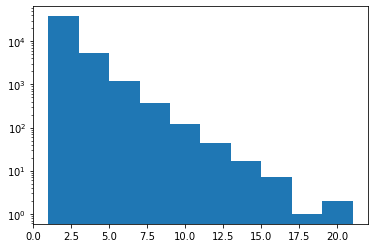

In [ ]:
fig = plt.figure()
ax = plt.axes()
ax.hist(connMat[connMat>0],log=True,histtype = 'bar');

In [ ]:
#%%

#  eigenvector of connectome

# manually curated elements that need to be zeroed
toClean = np.array([77150,77658,81172,82194])
cleanIndex = np.in1d(allCells,toClean)
b = np.where(cleanIndex==True)
connMat[:,b] = 0

vr = []
vl = []
eigenCentrality = []
_,vr = sc.eigs(connMat,k=1,which='LR',maxiter=5000);
_,vl = sc.eigs(np.transpose(connMat),k=1,which='LR',maxiter=5000);
eigenCentrality = np.sqrt(np.multiply(abs(vl.real),abs(vr.real)))

eigenSortIndex = np.argsort(eigenCentrality.real,axis=0)
eigenSortIndex = np.flip(eigenSortIndex) # flipping from high to low.
eigenCentralitySortedTop500 = eigenCentrality.real[eigenSortIndex[:500]]

inDegree =[]
outDegree =[]

outDegree = np.sum(connMat,axis=0)
inDegree = np.sum(connMat,axis=1)

outDegreePos = inDegree>0
inDegreePos = outDegree>0

degreeCentrality =np.sqrt(inDegree*outDegree)
degreeSortIndex = np.argsort(degreeCentrality,axis=0)
degreeSortIndex = np.flip(degreeSortIndex) # flipping from high to low.


Text(0, 0.5, 'Degreecentralty')

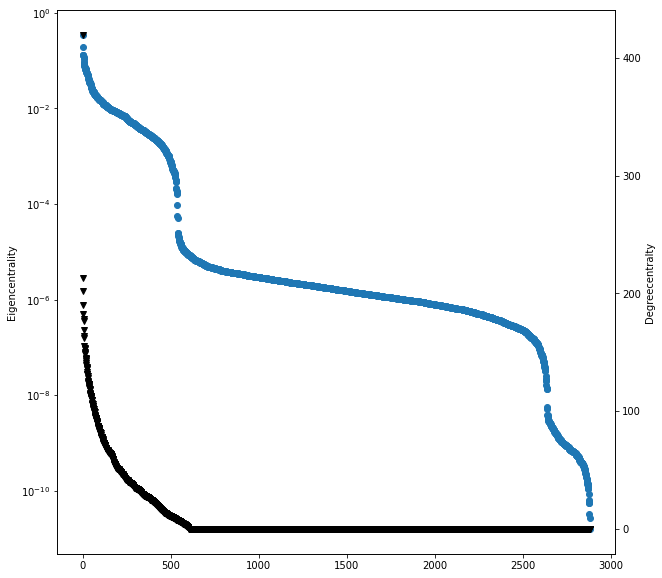

In [ ]:
# make some plots
# plt.subplot(1,2,1)
# plt.plot(vl.real[1:])
# plt.plot(vr.real[1:])


# plt.subplot(1,2,2)
plt.figure(figsize=[10,10])
ax = plt.gca()
plt.plot(np.reshape(eigenCentrality[eigenSortIndex[:2884]],[2884,1]), marker = 'o', label = 'eigencentrality',lw = 0)
plt.yscale("log")
plt.ylabel('Eigencentrality')

ax2 = ax.twinx()
ax2.plot(np.reshape(degreeCentrality[degreeSortIndex[:2884]],[2884,1]),marker = 'v', label = 'degreeCentrality',color = 'k',lw = 0)
plt.ylabel('Degreecentralty')

